In [1]:
import sys
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report
import yfinance
import stock_utils
import config
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
tickers = stock_utils.fetch_liquid_stocks(min_price=10)

In [3]:
ignored = stock_utils.get_ignored_symbols()

In [4]:
filtered_tickers = list(set(tickers) - set(ignored))

In [5]:
print(filtered_tickers)

['FB', 'COP', 'AMD', 'PINS', 'SUNW', 'ATVI', 'PYPL', 'VZ', 'RUN', 'NCLH', 'CVX', 'HPE', 'UAL', 'LB', 'TMUS', 'JWN', 'FISV', 'RF', 'NVAX', 'DXC', 'CHNG', 'JNPR', 'HPQ', 'JPM', 'GIS', 'RMG', 'UBER', 'WKHS', 'CLDR', 'PCG', 'SKT', 'F', 'MRK', 'DVAX', 'WDAY', 'MDLZ', 'UPS', 'FCEL', 'JBLU', 'SBUX', 'VLO', 'GPS', 'THCB', 'NVDA', 'CSX', 'ICLK', 'PM', 'AAL', 'LUV', 'SNAP', 'KR', 'SWKS', 'TJX', 'LYFT', 'EA', 'KO', 'NEM', 'GME', 'ALXN', 'COG', 'TSLA', 'EQT', 'AMAT', 'JNJ', 'USB', 'CFG', 'ZNGA', 'DFS', 'SE', 'WMT', 'RAD', 'KOSS', 'KMI', 'FTI', 'SAVE', 'SCHW', 'MDT', 'DD', 'RIOT', 'HBI', 'APA', 'BA', 'NEE', 'QCOM', 'GPK', 'MA', 'BLNK', 'DISH', 'KSS', 'MUR', 'CL', 'TWTR', 'CDE', 'GPRO', 'HBAN', 'GE', 'WORK', 'VUZI', 'SABR', 'IP', 'MO', 'LTHM', 'FEYE', 'BNGO', 'SQ', 'C', 'CNX', 'LLY', 'AMC', 'EXPE', 'TPR', 'DOW', 'HRB', 'WFC', 'CNK', 'EBAY', 'FLGT', 'KHC', 'MPW', 'WBA', 'MRNA', 'ABT', 'MGM', 'DIS', 'PFE', 'DDD', 'BK', 'X', 'BCRX', 'AEO', 'MSFT', 'SRNE', 'EHTH', 'PG', 'CVS', 'PLUG', 'FIS', 'IBM', 'AA'

In [6]:
# async with aiohttp.ClientSession() as session:
#     for t in filtered_tickers[:253]:
#         data[t] =  await stock_utils.fetch_historical_data_financialmodelingprep(t, config.FINANCIALMODELINGPREP_API, session, save_to_file=True)

In [7]:
PERIOD = '2y'

In [8]:
data = {}
for t in filtered_tickers:
    try:
        s = yfinance.Ticker(t)
        data[t] =  s.history(period=PERIOD)
        data[t].reset_index(inplace=True)
        data[t].columns = data[t].columns.str.lower()
        data[t] = data[t].iloc[::-1,:].reset_index(drop=True)
    except :
        print(t)

In [9]:
from bar import Bar

In [10]:
patterns_list2 = []
for key in data.keys():
    if data[key].empty or len(data[key]) < 2:
        continue
    try:
        bar1 = Bar(
            data[key].loc[0, 'open'],
            data[key].loc[0, 'high'],
            data[key].loc[0, 'low'],
            data[key].loc[0, 'close']
        )
        bar2 = Bar(
            data[key].loc[1, 'open'],
            data[key].loc[1, 'high'],
            data[key].loc[1, 'low'],
            data[key].loc[1, 'close']
        )
        if bar1  <= bar2:
            patterns_list2.append(key)
    except ValueError as e:
        print(e)
    except Exception as e:
        print(e)
        

        

Open price must be between High and Low:
 High:18.469999313354492 => Open:18.49970054626465 >= Low:15.899999618530273
Open price must be between High and Low:
 High:87.56999969482422 => Open:86.17500305175781 >= Low:86.20999908447266


In [11]:
patterns_list = []
for key in data.keys():
    if data[key].empty or len(data[key]) < 3:
        continue
    try:
        bar1 = Bar(
            data[key].loc[0, 'open'],
            data[key].loc[0, 'high'],
            data[key].loc[0, 'low'],
            data[key].loc[0, 'close'],
        )
        bar2 = Bar(
            data[key].loc[1, 'open'],
            data[key].loc[1, 'high'],
            data[key].loc[1, 'low'],
            data[key].loc[1, 'close'],
        )
        bar3 = Bar(
            data[key].loc[2, 'open'],
            data[key].loc[2, 'high'],
            data[key].loc[2, 'low'],
            data[key].loc[2, 'close'],
        )
        if bar1 <= bar2 <= bar3:
            patterns_list.append(key)
    except ValueError as e:
        print(e)
        

Open price must be between High and Low:
 High:18.469999313354492 => Open:18.49970054626465 >= Low:15.899999618530273
Open price must be between High and Low:
 High:87.56999969482422 => Open:86.17500305175781 >= Low:86.20999908447266


In [12]:
','.join(set(patterns_list+patterns_list2))

'FB,COP,AMD,ATVI,RUN,NCLH,HPE,UAL,LB,JWN,RF,NVAX,JNPR,HPQ,JPM,GIS,RMG,UBER,SKT,MRK,FCEL,MDLZ,UPS,JBLU,VLO,NVDA,PM,AAL,LUV,SWKS,KR,TJX,LYFT,EA,GME,KO,COG,ALXN,TSLA,EQT,USB,JNJ,CFG,WMT,KOSS,KMI,SCHW,MDT,RIOT,HBI,APA,BA,MA,BLNK,DISH,KSS,MUR,TWTR,HBAN,WORK,VUZI,GE,SABR,MO,LTHM,FEYE,BNGO,SQ,CNX,C,AMC,LLY,EXPE,DOW,CNK,EBAY,WFC,KHC,WBA,ABT,DIS,DDD,PFE,X,AEO,SRNE,EHTH,PG,CVS,IBM,KEY,CLNE,MPC,LVS,XOM,CCL,SLB,FCX,HST,KIM,BBBY,BAC,GM,EOG,WMB,WEN,KODK,INTC,GSX,MET,PEP,FHN,OXY,JCI,GOGO,BMY,GEVO,DAL,DVN,WDC,HAL,V,ORCL,GILD,SLM,CRM,WY,MARA,BSX,FITB,MS,VXRT,ABBV,SYF,MOS,AAPL,NKE'

In [13]:
','.join(patterns_list2)

'FB,COP,AMD,ATVI,RUN,NCLH,HPE,UAL,LB,JWN,RF,NVAX,JNPR,HPQ,JPM,GIS,RMG,UBER,SKT,MRK,MDLZ,UPS,FCEL,JBLU,VLO,NVDA,PM,AAL,LUV,KR,SWKS,TJX,LYFT,EA,KO,GME,ALXN,COG,TSLA,EQT,JNJ,USB,CFG,WMT,KOSS,KMI,SCHW,MDT,RIOT,HBI,APA,BA,MA,BLNK,DISH,KSS,MUR,TWTR,HBAN,GE,WORK,VUZI,SABR,MO,LTHM,FEYE,BNGO,SQ,C,CNX,LLY,AMC,EXPE,DOW,WFC,CNK,EBAY,KHC,WBA,ABT,DIS,PFE,DDD,X,AEO,SRNE,EHTH,PG,CVS,IBM,KEY,CLNE,MPC,LVS,XOM,CCL,SLB,FCX,HST,KIM,BBBY,BAC,EOG,GM,WMB,WEN,KODK,INTC,GSX,MET,PEP,FHN,OXY,JCI,GOGO,BMY,GEVO,DAL,DVN,WDC,HAL,V,CRM,GILD,SLM,ORCL,WY,MARA,BSX,FITB,MS,VXRT,ABBV,SYF,MOS,AAPL,NKE'

In [14]:
patterns_list3 = []
for key in data.keys():
    if data[key].empty or len(data[key]) < 3:
        continue
    try:
        bar1 = Bar(
            data[key].loc[0, 'open'],
            data[key].loc[0, 'high'],
            data[key].loc[0, 'low'],
            data[key].loc[0, 'close'],
        )
        bar2 = Bar(
            data[key].loc[1, 'open'],
            data[key].loc[1, 'high'],
            data[key].loc[1, 'low'],
            data[key].loc[1, 'close'],
        )
        bar3 = Bar(
            data[key].loc[2, 'open'],
            data[key].loc[2, 'high'],
            data[key].loc[2, 'low'],
            data[key].loc[2, 'close'],
        )
        if (bar3.range / bar2.range >= 1.7) and (bar2.range / bar1.range) >= 0.95:
            patterns_list3.append(key)
    except ValueError as e:
        print(e)
        

Open price must be between High and Low:
 High:18.469999313354492 => Open:18.49970054626465 >= Low:15.899999618530273
Open price must be between High and Low:
 High:87.56999969482422 => Open:86.17500305175781 >= Low:86.20999908447266


In [15]:
','.join(patterns_list3)

'FB,SKT,JBLU,AAL,KR,GME,KOSS,HBI,NEE,AMC,DIS,DDD,PG,BBBY,GM,KODK,GSX,GOGO'

In [16]:
patterns_list4 = []
for key in data.keys():
    if data[key].empty or len(data[key]) < 3:
        continue
    try:
        bar1 = Bar(
            data[key].loc[0, 'open'],
            data[key].loc[0, 'high'],
            data[key].loc[0, 'low'],
            data[key].loc[0, 'close'],
        )
        bar2 = Bar(
            data[key].loc[1, 'open'],
            data[key].loc[1, 'high'],
            data[key].loc[1, 'low'],
            data[key].loc[1, 'close'],
        )
        if (bar2.range * 1.5 < bar1.range) and ((bar1._close > bar2._high) or (bar1._close < bar2._low)):
            patterns_list4.append(key)
    except ValueError as e:
        print(e)
','.join(patterns_list4)    

Open price must be between High and Low:
 High:18.469999313354492 => Open:18.49970054626465 >= Low:15.899999618530273
Open price must be between High and Low:
 High:87.56999969482422 => Open:86.17500305175781 >= Low:86.20999908447266


'CVX,FISV,DXC,DVAX,WDAY,THCB,ICLK,SNAP,DFS,FTI,DD,CDE,GPRO,FLGT,MGM,BK,BCRX,MSFT,FIS,TIGR,PBI,M,ARLO,MAC,CLF,XRX,AMZN,IFF,SFIX,TXN,INO'

# Data Wrangling

In [18]:
def dummy_featuring(series_df, prefix):
    series_df['per_changed'] =  round((series_df.close - series_df.shift(-1).close)*100 / series_df.shift(-1).close, 2)
    series_df['cluster'] = pd.cut(series_df.per_changed, bins=[-99 , -5, -4.5 , -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5,  np.inf], labels=list(range(21))) 
    #series_df['cluster'] = pd.cut(series_df.per_changed, bins=[-99,-3 ,-0.5, 0.5, 3, np.inf], labels=list(range(5)))
    #series_df['cluster'] = pd.cut(series_df.per_changed, bins=[-99, -0.5, 0.5, np.inf], labels=list(range(3)))
    dummy_df = pd.get_dummies(series_df['cluster'], prefix=prefix, prefix_sep='_', drop_first=True)
    return pd.concat([series_df[['date']], dummy_df], axis=1)
    #return dummy_df
    

def df_featuring_v2(series_df):
    series_df['per_changed'] =  round((series_df.close - series_df.shift(-1).close)*100 / series_df.shift(-1).close, 2)
    #series_df['cluster'] = pd.cut(series_df.per_changed, bins=[-99,-6, -4, -2, -0.5, 0.5, 2, 4, 6, np.inf], labels=list(range(9)))
    #series_df['cluster'] = pd.cut(series_df.per_changed, bins=[-99, -2, -0.5, 0.5, 2, np.inf], labels=list(range(5)))
    series_df['cluster'] = pd.cut(series_df.per_changed, bins=[-99, -0.7, 0.7, np.inf], labels=list(range(3)))
    series_df['gap'] =  (series_df.open > series_df.shift(-1).high) | (series_df.open < series_df.shift(-1).low)
    return series_df[['date', 'open', 'high', 'low', 'close', 'cluster', 'gap']]

def model_df_v2(series_df, days=3):
    # model columns
    c =  []
    model_columns = []
    for n in range(days,0,-1):
        model_columns.extend(['o_'+str(n),
                  'h_'+str(n),
                  'l_'+str(n),
                  'c_'+str(n)])
    model_columns.append('o_0')
    c.extend(model_columns)

    spy_dummy_columns= ['spy_'+str(n) for n in range(1, 21)]
    vix_dummy_columns= ['vix_'+str(n) for n in range(1, 21)]
    qqq_dummy_columns= ['qqq_'+str(n) for n in range(1, 21)]
    dxy_dummy_columns= ['dxy_'+str(n) for n in range(1, 21)]
    dummy_columns = spy_dummy_columns + vix_dummy_columns + qqq_dummy_columns + dxy_dummy_columns
    c.extend(dummy_columns)
    c.append('cluster')
    df = pd.DataFrame(columns=c)
    for n in range(days,0,-1):
        df['o_' + str(n)] = series_df.shift(-n)['open']
        df['h_' + str(n)] = series_df.shift(-n)['high']
        df['l_' + str(n)] = series_df.shift(-n)['low']
        df['c_' + str(n)] = series_df.shift(-n)['close']
    df['o_0'] = series_df.open
    df['cluster'] = series_df['cluster']   
    df[dummy_columns] = series_df[dummy_columns]
    df.dropna(inplace=True)
    # opened without gap
    df = df[series_df['gap'] == False]
    #df = df[(df['o_0'] > 10) & (df['o_0'] < 50)] #test
    #normalization
    scaler = MinMaxScaler()
    df[model_columns] = scaler.fit_transform(df[model_columns].T).T
    return df 

In [19]:
def get_ticker_data(ticker, period='2y'):
    res = yfinance.Ticker(ticker)
    res =  res.history(period=period)
    res.reset_index(inplace=True)
    res.columns = res.columns.str.lower()
    res = res.iloc[::-1,:].reset_index(drop=True)
    return res

In [20]:
vix = get_ticker_data('^VIX', period=PERIOD)
vix_dummy = dummy_featuring(vix, 'vix')
vix_dummy

,date,vix_1,vix_2,vix_3,vix_4,vix_5,vix_6,vix_7,vix_8,vix_9,...,vix_11,vix_12,vix_13,vix_14,vix_15,vix_16,vix_17,vix_18,vix_19,vix_20
0,2021-02-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-01-29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2021-01-28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-01-27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2021-01-26,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,2019-02-08,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499,2019-02-07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
500,2019-02-06,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
501,2019-02-05,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
qqq = get_ticker_data('QQQ', period=PERIOD)
qqq_dummy = dummy_featuring(qqq, 'qqq')
qqq_dummy

,date,qqq_1,qqq_2,qqq_3,qqq_4,qqq_5,qqq_6,qqq_7,qqq_8,qqq_9,...,qqq_11,qqq_12,qqq_13,qqq_14,qqq_15,qqq_16,qqq_17,qqq_18,qqq_19,qqq_20
0,2021-02-01,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2021-01-29,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-01-28,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2021-01-27,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,2019-02-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499,2019-02-07,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
500,2019-02-06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
501,2019-02-05,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [22]:
spy = get_ticker_data('SPY', period=PERIOD)
spy

,date,open,high,low,close,volume,dividends,stock splits
0,2021-02-01,373.720001,377.339996,370.376007,376.230011,75817597,0.0,0
1,2021-01-29,375.630005,376.670013,368.269989,370.070007,126618400,0.0,0
2,2021-01-28,376.359985,381.929993,375.890015,377.630005,94198100,0.0,0
3,2021-01-27,380.220001,380.320007,372.010010,374.410004,123351100,0.0,0
4,2021-01-26,385.410004,385.850006,383.540009,383.790009,42665300,0.0,0
...,...,...,...,...,...,...,...,...
498,2019-02-08,258.920301,260.683355,258.033938,260.577393,75788900,0.0,0
499,2019-02-07,261.030219,261.617894,258.477150,260.259491,95482000,0.0,0
500,2019-02-06,262.812532,263.342404,261.974358,262.764343,58347800,0.0,0
501,2019-02-05,262.475342,263.438767,261.935827,263.111206,79552800,0.0,0


In [23]:
dxy = get_ticker_data('DX-Y.NYB', period=PERIOD)
dxy_dummy = dummy_featuring(dxy, 'dxy')
dxy_dummy

,date,dxy_1,dxy_2,dxy_3,dxy_4,dxy_5,dxy_6,dxy_7,dxy_8,dxy_9,...,dxy_11,dxy_12,dxy_13,dxy_14,dxy_15,dxy_16,dxy_17,dxy_18,dxy_19,dxy_20
0,2021-02-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-01-29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-01-28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-01-27,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2021-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,2019-02-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
494,2019-02-07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,2019-02-06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,2019-02-05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
spy_dummy = dummy_featuring(spy, 'spy')
spy_dummy = spy_dummy.merge(vix_dummy, on='date', how='left')
spy_dummy = spy_dummy.merge(qqq_dummy, on='date', how='left')
spy_dummy = spy_dummy.merge(dxy_dummy, on='date', how='left')
spy_dummy

,date,spy_1,spy_2,spy_3,spy_4,spy_5,spy_6,spy_7,spy_8,spy_9,...,dxy_11,dxy_12,dxy_13,dxy_14,dxy_15,dxy_16,dxy_17,dxy_18,dxy_19,dxy_20
0,2021-02-01,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-29,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-01-28,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-01-27,0,0,0,0,0,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-01-26,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,2019-02-08,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499,2019-02-07,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
500,2019-02-06,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
501,2019-02-05,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
featured_dfs = []
for key in data.keys():
    if data[key].empty:
        continue
    merged_data = df_featuring_v2(data[key]).merge(spy_dummy, on='date', how='left')
    m = model_df_v2(merged_data, days=3)
    featured_dfs.append(m)

In [26]:
m = pd.concat(featured_dfs, ignore_index=True)
m

,o_3,h_3,l_3,c_3,o_2,h_2,l_2,c_2,o_1,h_1,...,dxy_12,dxy_13,dxy_14,dxy_15,dxy_16,dxy_17,dxy_18,dxy_19,dxy_20,cluster
0,0.608420,0.936623,0.593481,0.785422,0.807152,0.848801,0.154820,0.336804,0.564961,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.580197,0.693688,0.196295,0.572670,0.580197,1.000000,0.561088,0.806600,0.834394,0.887666,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.036023,0.501440,0.035302,0.215417,0.477666,0.618876,0.000000,0.468300,0.477666,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.140366,0.484537,0.000000,0.426645,0.358447,0.870737,0.357653,0.555908,0.844569,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.358439,0.451917,0.000000,0.260928,0.380633,0.672495,0.261600,0.623402,0.565569,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72532,0.676469,0.735295,0.000000,0.235292,0.411764,0.970588,0.205880,0.529411,0.705883,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
72533,0.272727,0.848484,0.181819,0.787876,0.696969,0.757577,0.000000,0.242422,0.424242,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
72534,0.704543,1.000000,0.181816,0.250001,0.204545,0.636362,0.136364,0.590906,0.522726,0.568182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
72535,0.112904,1.000000,0.000000,0.467742,0.596774,0.806453,0.225806,0.274195,0.241936,0.548387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [159]:
#m = model_df_v2(dfs, days=3)
#m

#  Train-test split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(m.drop(['cluster'], axis=1), m.cluster, stratify=m.cluster, test_size=0.25)

In [28]:
len(y_train[y_train == 0]) / len(y_train)

0.33601705819638983

In [29]:
len(y_train[y_train == 1]) / len(y_train)

0.3233337009668762

In [30]:
len(y_train[y_train == 2]) / len(y_train)

0.3406492408367339

# Random Forest

In [166]:
gsc = GridSearchCV(estimator=RandomForestClassifier(),
                  param_grid={
                      'max_depth' : range(3, 10),
                      'n_estimators' : (9, 50, 100, 500, 1000, 2000)
                  }, 
                  cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [167]:
grid_results = gsc.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
grid_results.best_params_

In [ ]:
rfc_model = grid_results.best_estimator_

In [81]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=10)

### Evaluation

In [82]:
y_pred = rfc_model.predict(X_test)

In [83]:
accuracy_score(y_pred, y_test)

0.49573647345447164

In [40]:
def generalize(x):
    if x < 1:
        return 0
    elif x > 1:
        return 2
    else :
        return 1
    
gfunc = np.vectorize(generalize)

In [41]:
accuracy_score(gfunc(y_pred), gfunc(y_test))

0.5000263476840385

In [240]:
X[1]

array([8.92877518e-04, 3.57142492e-02, 0.00000000e+00, 3.03571544e-02,
       8.92877518e-04, 3.57142492e-02, 0.00000000e+00, 3.03571544e-02,
       9.74107063e-01, 1.00000000e+00, 9.64285580e-01, 9.82142790e-01,
       9.74107063e-01])

# Deep Learning

In [31]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.initializers import Constant

In [32]:
init_kernel = TruncatedNormal(mean=0, stddev=0.05, seed=1234)
init_bias = Constant(value=1e-3)
deep_model = Sequential()

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

deep_model.add(Dense(128, input_dim=len(m.columns)-1, activation='relu', kernel_initializer=init_kernel, bias_initializer=init_bias))
#deep_model.add(Dropout(0.5))
deep_model.add(Dense(128, activation='relu', kernel_initializer=init_kernel, bias_initializer=init_bias))
#deep_model.add(Dense(35, activation='relu', kernel_initializer=init_kernel, bias_initializer=init_bias))
# deep_model.add(Dense(32, activation='relu', kernel_initializer=init_kernel, bias_initializer=init_bias))
# deep_model.add(Dropout(0.4))
deep_model.add(Dense(3, activation='softmax', kernel_initializer=init_kernel, bias_initializer=init_bias))
deep_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
deep_model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_split=0.2, callbacks=[es_callback])#, validation_data=(X_val, y_val))

Epoch 1/2000
1361/1361 [==============================] - 3s 2ms/step - loss: 1.0189 - accuracy: 0.4775 - val_loss: 0.9845 - val_accuracy: 0.5068
Epoch 2/2000
1361/1361 [==============================] - 2s 1ms/step - loss: 0.9695 - accuracy: 0.5194 - val_loss: 0.9671 - val_accuracy: 0.5170
Epoch 3/2000
1361/1361 [==============================] - 2s 1ms/step - loss: 0.9540 - accuracy: 0.5263 - val_loss: 0.9619 - val_accuracy: 0.5219
Epoch 4/2000
1361/1361 [==============================] - 2s 1ms/step - loss: 0.9483 - accuracy: 0.5335 - val_loss: 0.9577 - val_accuracy: 0.5236
Epoch 5/2000
1361/1361 [==============================] - 2s 1ms/step - loss: 0.9395 - accuracy: 0.5358 - val_loss: 0.9545 - val_accuracy: 0.5265
Epoch 6/2000
1361/1361 [==============================] - 2s 1ms/step - loss: 0.9329 - accuracy: 0.5430 - val_loss: 0.9538 - val_accuracy: 0.5275
Epoch 7/2000
1361/1361 [==============================] - 2s 1ms/step - loss: 0.9312 - accuracy: 0.5432 - val_loss: 0.9591 -

## Potential SELL

In [33]:
clus = 0
deep_model.evaluate(X_test[y_test ==clus], y_test[y_test ==clus])

191/191 [==============================] - 0s 748us/step - loss: 0.8816 - accuracy: 0.5711


[0.8815596103668213, 0.5711472034454346]

## Potential BUY

In [34]:
clus = 2
deep_model.evaluate(X_test[y_test ==clus], y_test[y_test ==clus])

194/194 [==============================] - 0s 758us/step - loss: 0.9002 - accuracy: 0.5997


[0.9001865386962891, 0.599708616733551]

In [35]:
y_test.value_counts()

2    6178
0    6093
1    5864
Name: cluster, dtype: int64

In [36]:
pred = []
for res in deep_model.predict(X_test):
    pred.append(np.argmax(res))
pred = np.array(pred)

accuracy_score(y_test,  pred)

0.5348221670802316

In [37]:
deep_model.save('01_23_21.model')

INFO:tensorflow:Assets written to: 01_23_21.model\assets


#  Prediction

In [322]:
loaded_model = tf.keras.models.load_model('12_23_20.model')

In [323]:
up, down = [], []
for key in data.keys():
    stock = data[key].iloc[:4]
    df = df_featuring_v2(stock).merge(spy_dummy, on='date', how='left')
    try:
        mt = model_df_v2(df)
    except:
        continue
    pred = loaded_model.predict(mt.drop(['cluster'], axis=1))
    signal = np.argmax(pred)
    if signal == 0:
        down.append((key, pred[0][signal]))
    elif signal == 2:
        up.append((key, pred[0][signal]))

In [324]:
up.sort(key= lambda s : s[1], reverse=True)
up

[('DIS', 0.5602764),
 ('MARA', 0.50385004),
 ('RIOT', 0.4739845),
 ('JNJ', 0.41651472),
 ('WMT', 0.4164169),
 ('PBCT', 0.40450177),
 ('POLA', 0.37074807),
 ('RF', 0.34795973)]

In [325]:
down.sort(key= lambda s : s[1], reverse=True)
down

[('INTC', 0.8266818),
 ('MGM', 0.7462077),
 ('FUV', 0.7262829),
 ('WDC', 0.72622013),
 ('FANG', 0.71726835),
 ('TAL', 0.6970729),
 ('HPQ', 0.6706808),
 ('CSCO', 0.6659724),
 ('LUV', 0.66370827),
 ('TIGR', 0.65436524),
 ('AAL', 0.64604807),
 ('NVDA', 0.64337885),
 ('FIS', 0.63136345),
 ('SUNW', 0.6282672),
 ('JNPR', 0.61720806),
 ('BBBY', 0.60545313),
 ('AAPL', 0.6053156),
 ('DVN', 0.60336214),
 ('SPWR', 0.60221076),
 ('COG', 0.5951812),
 ('JCI', 0.58229613),
 ('DDD', 0.5822772),
 ('DBX', 0.58187324),
 ('VUZI', 0.5808423),
 ('SNAP', 0.58016646),
 ('FEYE', 0.5798619),
 ('FSLY', 0.5753547),
 ('UAL', 0.57488525),
 ('COF', 0.5678569),
 ('ORCL', 0.56497693),
 ('CLNE', 0.56293476),
 ('LVS', 0.56232405),
 ('GPS', 0.5557153),
 ('D', 0.5523694),
 ('NFLX', 0.5519825),
 ('WY', 0.55074865),
 ('RUN', 0.55057204),
 ('MRNA', 0.54882926),
 ('PFE', 0.54881394),
 ('KIM', 0.54834497),
 ('CVS', 0.5342834),
 ('CHNG', 0.5338598),
 ('EXC', 0.5314146),
 ('KHC', 0.52155036),
 ('AGNC', 0.5179788),
 ('RMG', 0.514

In [89]:
list(zip(*up))[0]

('SRNE',
 'WFC',
 'GNPX',
 'KMI',
 'JBLU',
 'MDLZ',
 'AES',
 'PG',
 'WMB',
 'FCX',
 'V',
 'DVN',
 'M',
 'RF',
 'AFL',
 'KOS',
 'USB',
 'PFE',
 'AMAT',
 'JWN',
 'NOV',
 'HBAN',
 'MRO',
 'FANG',
 'CNP',
 'C',
 'DAL',
 'EBAY',
 'GM',
 'EVRG',
 'TRVN',
 'CVX',
 'SM',
 'NLY',
 'CCL',
 'GLW',
 'NEE',
 'SCHW',
 'COP',
 'PPL',
 'APA',
 'NRZ',
 'BAC',
 'TWTR',
 'HAL',
 'CSX',
 'OXY',
 'XOM',
 'COTY',
 'PSTG',
 'PAGP',
 'GE',
 'PBF',
 'X',
 'BSX',
 'SLB',
 'HPE',
 'MPC',
 'AEO',
 'HL',
 'BE',
 'AM',
 'KO',
 'F',
 'VZ',
 'PRTY',
 'SPWR',
 'AR',
 'CVS',
 'CNK',
 'RUN',
 'JCI',
 'MO',
 'RAD',
 'SIRI',
 'MFA',
 'TPR',
 'HBI',
 'OPK',
 'LUV',
 'BBBY',
 'BA',
 'JPM',
 'QEP',
 'WORK',
 'CPE',
 'MGM',
 'NYMT',
 'AQMS',
 'CLF',
 'PAA',
 'LYFT',
 'MRK',
 'AAPL',
 'IDEX',
 'JNJ')

In [ ]:
clf_xgb.fit(X_train, y_train, verbose=)

# XGBOOST

In [38]:
import  xgboost as xgb

In [39]:
clf_xgb = xgb.XGBClassifier(missing=None, seed=1234, objective='multi:softmax', num_class=3)

In [40]:
clf_xgb.fit(X_train, y_train, verbose=True, early_stopping_rounds=10, eval_metric=['mlogloss', 'merror'], eval_set=[(X_test, y_test)])

[0]	validation_0-mlogloss:1.05615	validation_0-merror:0.49771
[1]	validation_0-mlogloss:1.02910	validation_0-merror:0.48850
[2]	validation_0-mlogloss:1.01074	validation_0-merror:0.49060
[3]	validation_0-mlogloss:0.99719	validation_0-merror:0.48773
[4]	validation_0-mlogloss:0.98890	validation_0-merror:0.48602
[5]	validation_0-mlogloss:0.98156	validation_0-merror:0.48453
[6]	validation_0-mlogloss:0.97684	validation_0-merror:0.48222
[7]	validation_0-mlogloss:0.97129	validation_0-merror:0.48150
[8]	validation_0-mlogloss:0.96698	validation_0-merror:0.47637
[9]	validation_0-mlogloss:0.96373	validation_0-merror:0.47516
[10]	validation_0-mlogloss:0.96142	validation_0-merror:0.47323
[11]	validation_0-mlogloss:0.95960	validation_0-merror:0.47240
[12]	validation_0-mlogloss:0.95756	validation_0-merror:0.47180
[13]	validation_0-mlogloss:0.95596	validation_0-merror:0.47152
[14]	validation_0-mlogloss:0.95450	validation_0-merror:0.46986
[15]	validation_0-mlogloss:0.95317	validation_0-merror:0.47008
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_class=3, num_parallel_tree=1,
              objective='multi:softprob', random_state=1234, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=1234, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
ignored_filter = y_test != 1
X_test_filtered = X_test[ignored_filter]
y_test_filtered = y_test[ignored_filter]

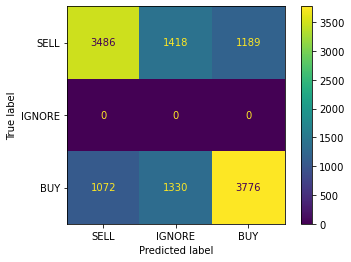

In [49]:
plot_confusion_matrix(clf_xgb,
                     X_test_filtered,
                     y_test_filtered,
                     values_format='d',
                     display_labels=['SELL', 'IGNORE', 'BUY'])

In [50]:
print(classification_report(y_test_filtered, clf_xgb.predict(X_test_filtered)))

              precision    recall  f1-score   support

           0       0.76      0.57      0.65      6093
           1       0.00      0.00      0.00         0
           2       0.76      0.61      0.68      6178

    accuracy                           0.59     12271
   macro avg       0.51      0.39      0.44     12271
weighted avg       0.76      0.59      0.67     12271



## GridSearchCV

In [65]:
param_grid = {
    'max_depth' : [8],
    'learning_rate' : [0.1],
    'gamma' : [0.25],
    'reg_lambda' : [1],
}
gsc_xgb = GridSearchCV(estimator=xgb.XGBClassifier(missing=None, 
                                                   seed=1234,
                                                   objective='multi:softmax', 
                                                   num_class=3,
                                                  ),
                  param_grid=param_grid, 
                  cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

In [66]:
xgb_grid_results = gsc_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.1min remaining:   42.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished


[23:38:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [67]:
# {'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 8, 'reg_lambda': 1}
gsc_xgb.best_params_

{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 8, 'reg_lambda': 1}

In [68]:
best_cls = gsc_xgb.best_estimator_
#best_cls.fit(X_train, y_train, verbose=True, early_stopping_rounds=10, eval_metric=['mlogloss', 'merror'], eval_set=[(X_test, y_test)])

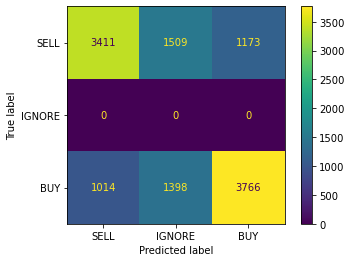

In [69]:
plot_confusion_matrix(best_cls,
                     X_test_filtered,
                     y_test_filtered,
                     values_format='d',
                     display_labels=['SELL', 'IGNORE', 'BUY'])

In [79]:
print(classification_report(y_test_filtered, best_cls.predict(X_test_filtered)))

              precision    recall  f1-score   support

           0       0.77      0.56      0.65      6093
           1       0.00      0.00      0.00         0
           2       0.76      0.61      0.68      6178

    accuracy                           0.58     12271
   macro avg       0.51      0.39      0.44     12271
weighted avg       0.77      0.58      0.66     12271



In [71]:
import shap

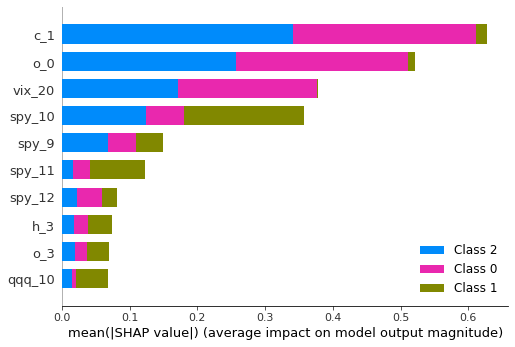

In [81]:
explainer = shap.TreeExplainer(best_cls)
shap_values = explainer.shap_values(X_test_filtered)
shap.summary_plot(shap_values, X_test_filtered, max_display=10)

## XGBoost Prediction

In [47]:
up, down = [], []
for key in data.keys():
    stock = data[key].iloc[:4]
    df = df_featuring_v2(stock).merge(spy_dummy, on='date', how='left')
    try:
        mt = model_df_v2(df)
    except:
        continue
    pred = best_cls.predict(mt.drop(['cluster'], axis=1))
    if pred == 0:
        down.append(key)
    elif pred == 2:
        up.append(key)

In [48]:
up

['JNJ', 'SAVA']

In [49]:
down

['GS',
 'KDP',
 'RCL',
 'BE',
 'HST',
 'SABR',
 'SLB',
 'AMAT',
 'HAL',
 'HPE',
 'JBLU',
 'KIM',
 'K',
 'PRTS',
 'PBCT',
 'PLUG',
 'PCG',
 'PYPL',
 'C',
 'IBM',
 'EOG',
 'NVDA',
 'D',
 'PK',
 'MGM',
 'DBX',
 'BYND',
 'NVTA',
 'SO',
 'TAL',
 'COP',
 'CTVA',
 'BMY',
 'KHC',
 'MUR',
 'AFL',
 'CNX',
 'WBA',
 'RUN',
 'UAA',
 'MTCH',
 'CVS',
 'LB',
 'DISH',
 'APA',
 'EXC',
 'AA',
 'MS',
 'XOM',
 'WU',
 'JCI',
 'LYFT',
 'LVS',
 'POLA',
 'F',
 'CFG',
 'CL',
 'PENN',
 'FCX',
 'GM',
 'GILD',
 'OXY',
 'DVN',
 'HPQ',
 'VST',
 'HOME',
 'SFIX',
 'ON',
 'PPL',
 'WFC',
 'CVX',
 'PFE',
 'SAVE',
 'FHN',
 'CPB',
 'MET',
 'FB',
 'GIS',
 'BLNK',
 'DD',
 'GE',
 'MDLZ',
 'MU',
 'KEY',
 'PSTG',
 'GPS',
 'OSTK',
 'WKHS',
 'ALLY',
 'NOV',
 'CYH',
 'AAL',
 'TJX',
 'LUV',
 'GPK',
 'FOLD',
 'NFLX',
 'BK',
 'TXN',
 'AMD',
 'UBER',
 'KMI',
 'EPD',
 'ORCL',
 'FTI',
 'SLM',
 'BAC',
 'DIS',
 'USB',
 'HRL']

In [52]:
stock = data['INTC'].iloc[:4]
df = df_featuring_v2(stock).merge(spy_dummy, on='date', how='left')
try:
    mt = model_df_v2(df)
except:
    pass
pred = best_cls.predict(mt.drop(['cluster'], axis=1))
pred

array([0], dtype=int64)

# Catboost

In [73]:
from catboost import CatBoostClassifier

In [75]:
cat_model = CatBoostClassifier(iterations=50,
                               loss_function='MultiClass',
                               grow_policy='Lossguide',
                               verbose=50
                              )
cat_model.set_scale_and_bias(0.25, 0.25)

In [76]:
grid = {'learning_rate': [0.5],
        'depth': [11],
        'max_leaves': [60, 70, 80],
        'l2_leaf_reg': [1]}

In [77]:
cat_model.grid_search(grid, X=X_train, y=y_train)


bestTest = 0.966343137
bestIteration = 32

0:	loss: 0.9663431	best: 0.9663431 (0)	total: 1.69s	remaining: 3.39s

bestTest = 0.9624718298
bestIteration = 27

1:	loss: 0.9624718	best: 0.9624718 (1)	total: 3.3s	remaining: 1.65s

bestTest = 0.9643309981
bestIteration = 25

2:	loss: 0.9643310	best: 0.9624718 (1)	total: 5.06s	remaining: 0us
Estimating final quality...


{'params': {'max_leaves': 70,
  'depth': 11,
  'l2_leaf_reg': 1,
  'learning_rate': 0.5},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,

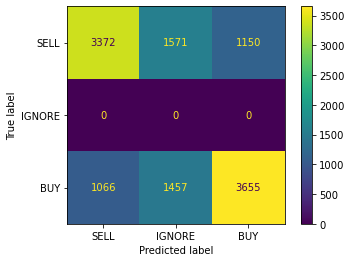

In [82]:
plot_confusion_matrix(cat_model,
                     X_test_filtered,
                     y_test_filtered,
                     values_format='d',
                     display_labels=['SELL', 'IGNORE', 'BUY'])

In [83]:
print(classification_report(y_test_filtered, cat_model.predict(X_test_filtered)))

              precision    recall  f1-score   support

           0       0.76      0.55      0.64      6093
           1       0.00      0.00      0.00         0
           2       0.76      0.59      0.67      6178

    accuracy                           0.57     12271
   macro avg       0.51      0.38      0.44     12271
weighted avg       0.76      0.57      0.65     12271

